**Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,BatchNormalization,MaxPooling2D,Conv2D,Input
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import Model
from sklearn.metrics import classification_report , confusion_matrix

**Baca Dataset**

In [ ]:
import os

dataset_path = '/content/drive/MyDrive/STUDPEN STARTUP CAMPUS/Proyek Akhir/Dataset Ban'

for dirname, _, filenames in os.walk(dataset_path):
    print(dirname)

**Baca Banyak Dataset Good dan Defective**

In [ ]:
good = glob.glob(r'/content/drive/MyDrive/STUDPEN STARTUP CAMPUS/Proyek Akhir/Dataset Ban/good/*.jpg')
defective = glob.glob(r'/content/drive/MyDrive/STUDPEN STARTUP CAMPUS/Proyek Akhir/Dataset Ban/defective/*.jpg')

random.shuffle(good)
random.shuffle(defective)

print ('number of good tyres : {} images'.format(len (good)))
print ('number of defective tyres : {} images'.format(len (defective)))

number of good tyres : 0 images
number of defective tyres : 0 images


**Membagi train Test Good dan Defective**



In [ ]:
train_good = good [:int (len (good) *0.8)]
test_good = good[int (len (good) *0.8):]

train_defective = defective [:int (len (defective) *0.8)]
test_defective = defective[int (len (defective) *0.8):]

print ('number of train good tyres : {} images'.format(len (train_good)))
print ('number of test good tyres : {} images'.format(len (test_good)))
print ('number of train defective tyres : {} images'.format(len (train_defective)))
print ('number of test defective tyres : {} images'.format(len (test_defective)))

number of train good tyres : 662 images
number of test good tyres : 166 images
number of train defective tyres : 822 images
number of test defective tyres : 206 images


**Plotting Sample Masing - masing kategori**

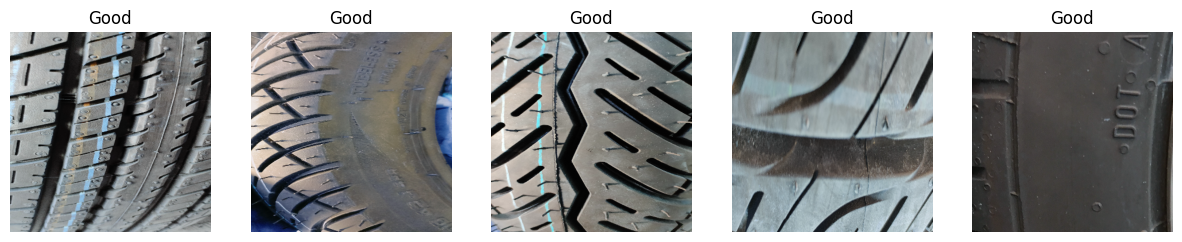

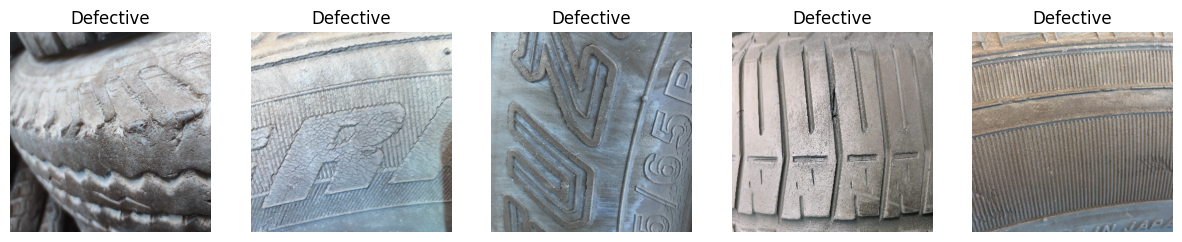

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt

image_shape = 350

def plot_images(data, image_title, num_of_images):
    plt.figure(figsize=(15, 10))
    for i in range(num_of_images):
        random_image = random.choice(data)
        if isinstance(data, list):
            random_image = cv2.resize(cv2.imread(random_image), (image_shape, image_shape))
        plt.subplot(1, num_of_images, i+1)
        plt.imshow(random_image)
        plt.axis('off')
        plt.title(image_title)

    plt.show()

plot_images(train_good, 'Good', 5)
plot_images(train_defective, 'Defective', 5)

**Distribusi Kategori**

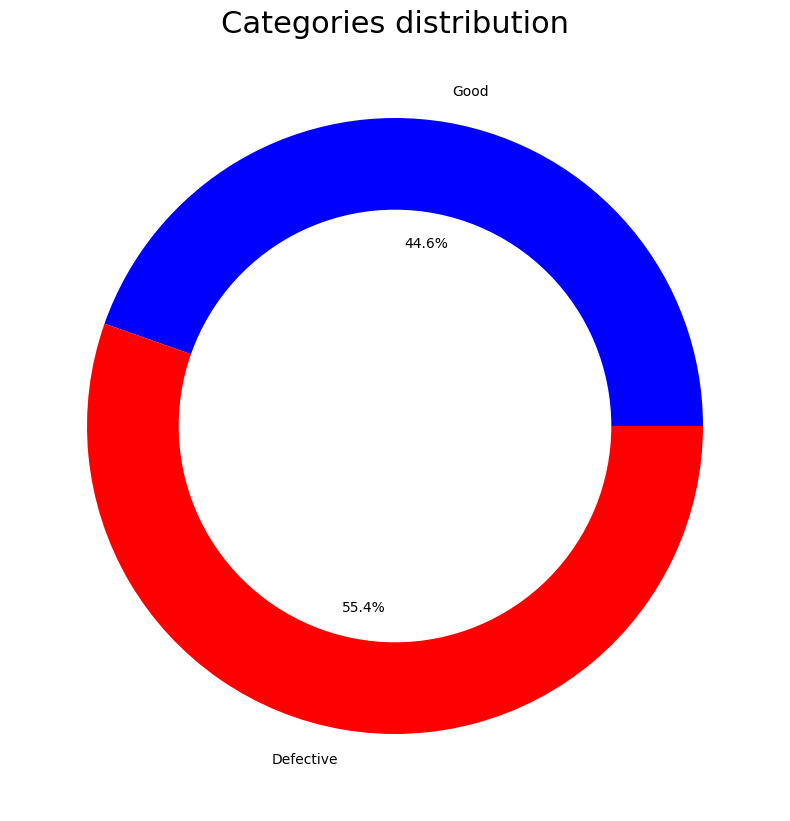

In [ ]:
def plt_pie (data,labels,colors,title):
    plt.figure(figsize=(20,10))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(data,labels = labels, colors = colors , autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title (title,fontsize = 22)
    plt.show()

data = [len (train_good) , len (train_defective) ]
labels = ['Good' , 'Defective' ]

plt_pie (data,labels,['blue','red'] , 'Categories distribution')

**Membuat fungsi baru**

In [ ]:
def colorjitter(img, cj_type="b"):
    '''
    ### Different Color Jitter ###
    img: image
    cj_type: {b: brightness, s: saturation, c: constast}
    '''
    images =[]
    if cj_type == "b":
        value = np.random.choice(np.array([-50, -40, -30, 30, 40, 50]))
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        if value >= 0:
            lim = 255 - value
            v[v > lim] = 255
            v[v <= lim] += value
        else:
            lim = np.absolute(value)
            v[v < lim] = 0
            v[v >= lim] -= np.absolute(value)

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return (img)
    elif cj_type == "s":
        value = np.random.choice(np.array([-50, -40, -30, 30, 40, 50]))
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        if value >= 0:
            lim = 255 - value
            s[s > lim] = 255
            s[s <= lim] += value
        else:
            lim = np.absolute(value)
            s[s < lim] = 0
            s[s >= lim] -= np.absolute(value)

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return (img)
    elif cj_type == "c":
        brightness = 10
        contrast = random.randint(40, 100)
        dummy = np.int16(img)
        dummy = dummy * (contrast/127+1) - contrast + brightness
        dummy = np.clip(dummy, 0, 255)
        img = np.uint8(dummy)
        return (img)

In [ ]:
def random_flip (img):
    img = cv2.flip (img,random.choice([0,1]))  #1 ---- vertical flip  0----- horz flip
    return img

**Meningkatkan gambar**

In [ ]:
def increase_image (data, target):
    images =[]
    for image in data:
        img = cv2.resize(cv2.imread(image), (image_shape, image_shape) )
        images.append(img)
    for i in range (int (target / len (data))):
        for image in data:
            img = cv2.resize(cv2.imread(image), (image_shape, image_shape) )
            img = random_flip (img)
            images.append (colorjitter(img,random.choice(['b','s','c']) ))
            if (len (images)>= target ):
                break
    return np.array (images)

In [ ]:
def convert_links_to_images(data):
    images =[]
    for image in data:
        img = cv2.resize(cv2.imread(image), (image_shape, image_shape) )
        images.append(img)
    return np.array (images)

In [ ]:
train_good_images = increase_image (train_good, 1250)
train_defective_images = increase_image (train_defective, 1250)
test_good_images = convert_links_to_images(test_good)
test_defective_images = convert_links_to_images(test_defective)

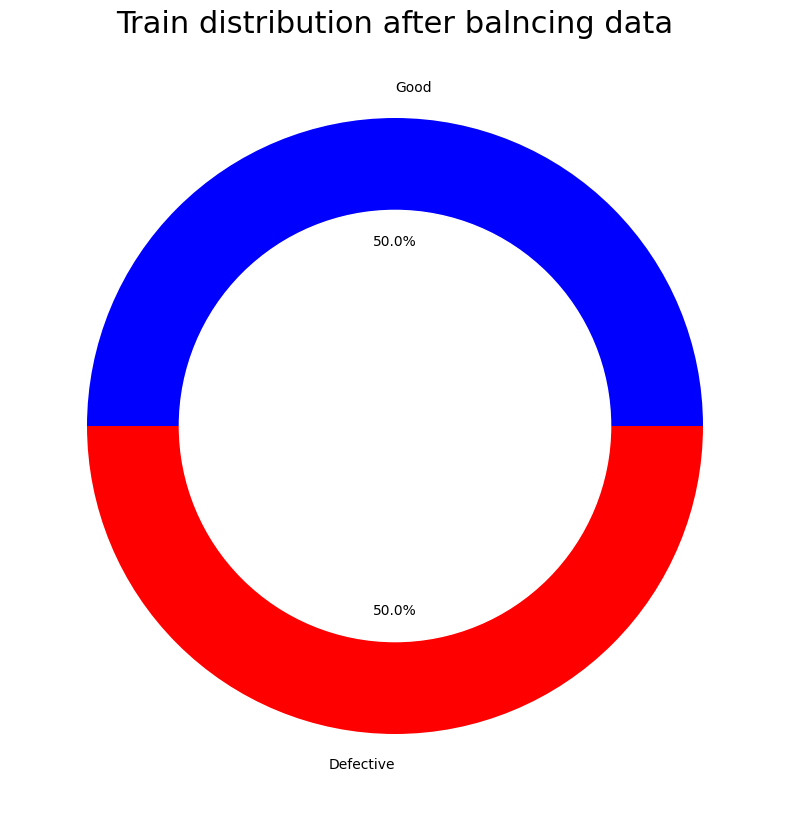

In [ ]:
plt_pie ([len (train_good_images) ,len (train_defective_images)] ,
         labels,['blue','red'],'Train distribution after balncing data')

**plot sampel gambar setelah pengeditan kualitas**

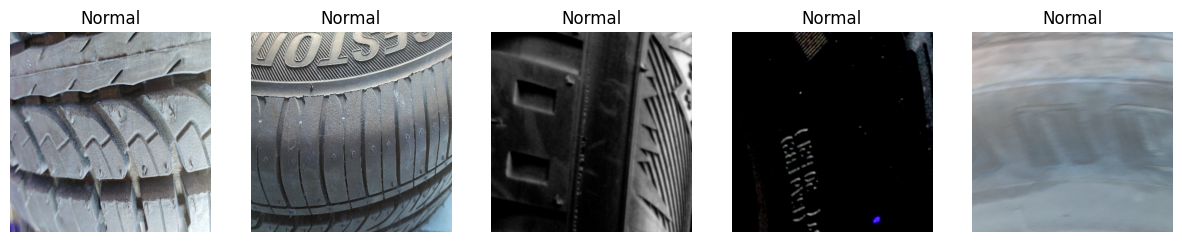

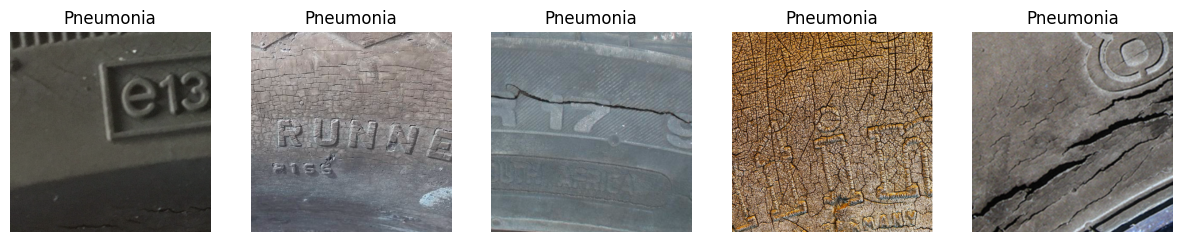

In [ ]:
plot_images (train_good_images ,'Normal',5)
plot_images (train_defective_images ,'Pneumonia',5)

**train test data**

In [ ]:
y_train = np.concatenate ([np.zeros (len(train_good_images)) , np.ones (len (train_defective_images)) ])
y_test = np.concatenate ([np.zeros (len(test_good_images)) , np.ones (len (test_defective_images))] )

X_train = np.concatenate ([train_good_images,train_defective_images],axis = 0)
X_test = np.concatenate ([test_good_images,test_defective_images],axis = 0)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
#------------------------free some memory---------------
train_good_images,train_defective_images,test_good_images,test_defective_images = None,None,None,None
del train_good_images,train_defective_images,test_good_images,test_defective_images

(2500, 350, 350, 3)
(2500,)
(372, 350, 350, 3)
(372,)


In [ ]:
train_datagen = ImageDataGenerator( rescale=.1/255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=.1/255,)

train_generator = train_datagen.flow(X_train, y_train,batch_size=16,shuffle=True)
test_generator = test_datagen.flow(X_test, y_test,batch_size=16,shuffle=False)
#---------------------------free some memory--------------------
X_train,y_train,X_test = None, None,None
del X_train,y_train,X_test

**Inception v3 pretrained model**

In [ ]:
inception = keras.applications.inception_v3.InceptionV3  (input_shape = (image_shape, image_shape,3),
                                                          include_top = False,
                                                          weights = 'imagenet')
inception.trainable = False
last_output = inception.get_layer('mixed8').output

87910968/87910968 [==============================] - 0s 0us/step


mungkin modifnya bisa dari sini, saat pake pretrained model

In [ ]:
# import torch
# import torch.nn as nn
# import torchvision.models as models

In [ ]:
# # Load pre-trained InceptionV3 model
# inception_v3 = models.inception_v3(pretrained=True)

In [ ]:
# # Modify the classifier for your specific task
# inception_v3.fc = nn.Sequential(
#     nn.Linear(2048, 128),
#     nn.ReLU(),
#     nn.Dropout(0.5),
#     nn.Linear(128, 1),  # Assuming binary classification (1 output unit)
#     nn.Sigmoid()  # For binary classification, use sigmoid activation
# )

In [ ]:
# # Example: Freeze the pre-trained layers
# for param in inception_v3.parameters():
#     param.requires_grad = False

# # Print the modified model
# print(inception_v3)

**Full model dan fit model**

In [ ]:
x = Flatten()(last_output)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inception.input, outputs=x)

callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights = True,verbose = 1),
             ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)]

model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,epochs=5,validation_data=test_generator,callbacks=[callbacks])
model.load_weights('model.h5')

Epoch 1/5
157/157 [==============================] - ETA: 0s - loss: 0.3920 - accuracy: 0.8120

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 105s 566ms/step - loss: 0.3920 - accuracy: 0.8120 - val_loss: 0.3371 - val_accuracy: 0.8495
Epoch 2/5
157/157 [==============================] - 87s 554ms/step - loss: 0.2821 - accuracy: 0.8804 - val_loss: 0.2993 - val_accuracy: 0.8790
Epoch 3/5
157/157 [==============================] - 87s 552ms/step - loss: 0.2704 - accuracy: 0.8788 - val_loss: 0.4747 - val_accuracy: 0.7876
Epoch 4/5
157/157 [==============================] - 88s 561ms/step - loss: 0.2494 - accuracy: 0.8908 - val_loss: 0.2017 - val_accuracy: 0.9140
Epoch 5/5
157/157 [==============================] - 87s 553ms/step - loss: 0.2335 - accuracy: 0.9044 - val_loss: 0.1795 - val_accuracy: 0.9301


**plot loss dan akurasi**

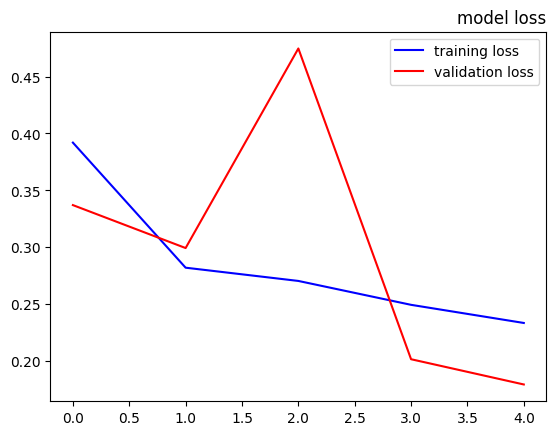

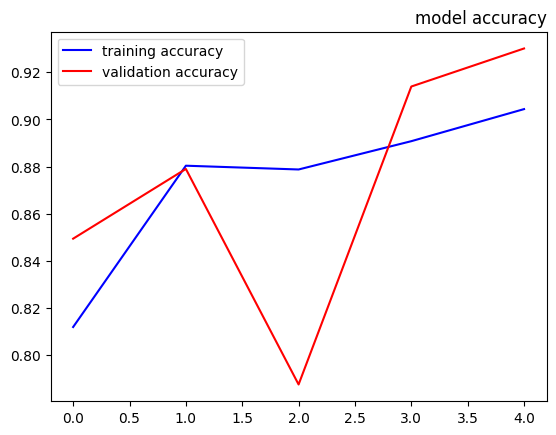

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
tarin_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range (len (train_loss)),train_loss,c='b',label = 'training loss')
plt.plot (range (len (val_loss)),val_loss,c='r',label = 'validation loss')
plt.title ('model loss',loc ='right')
plt.legend()
plt.show()

plt.plot(range (len (tarin_acc)),tarin_acc,c='b',label = 'training accuracy')
plt.plot (range (len (val_acc)),val_acc,c='r',label = 'validation accuracy')
plt.title ('model accuracy',loc ='right')
plt.legend()
plt.show()

**mendapatkan output prediksi**

In [ ]:
y_pred = model.predict (test_generator)
y_pred = y_pred.reshape (-1,)
y_pred = np.float16(y_pred>=0.5 )

24/24 [==============================] - 3s 74ms/step


**confusion matrix**

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       166
         1.0       0.96      0.91      0.94       206

    accuracy                           0.93       372
   macro avg       0.93      0.93      0.93       372
weighted avg       0.93      0.93      0.93       372



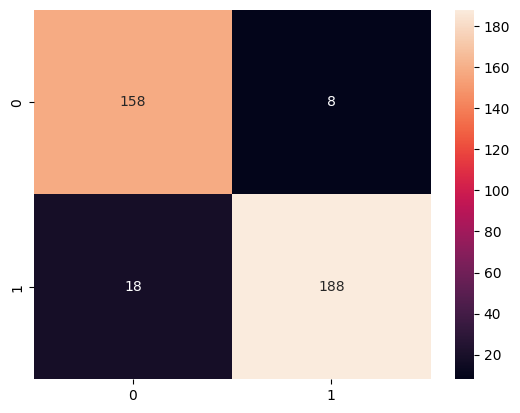

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d')
print (classification_report (y_test,y_pred))

**add drop layer**

In [ ]:
from keras.layers import Dropout

# Model definition
inception = keras.applications.inception_v3.InceptionV3(
    input_shape=(image_shape, image_shape, 3),
    include_top=False,
    weights='imagenet'
)
inception.trainable = False
last_output = inception.get_layer('mixed8').output

x = Flatten()(last_output)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Tambahkan lapisan dropout di sini
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Tambahkan lapisan dropout di sini
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inception.input, outputs=x)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=5e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    callbacks=[callbacks]
)

Epoch 1/5
157/157 [==============================] - 98s 550ms/step - loss: 0.6031 - accuracy: 0.7108 - val_loss: 0.3501 - val_accuracy: 0.8145
Epoch 2/5
157/157 [==============================] - 85s 544ms/step - loss: 0.4578 - accuracy: 0.7952 - val_loss: 0.2550 - val_accuracy: 0.8925
Epoch 3/5
157/157 [==============================] - 87s 554ms/step - loss: 0.3889 - accuracy: 0.8308 - val_loss: 0.2491 - val_accuracy: 0.9005
Epoch 4/5
157/157 [==============================] - 85s 542ms/step - loss: 0.3527 - accuracy: 0.8528 - val_loss: 0.2342 - val_accuracy: 0.9059
Epoch 5/5
157/157 [==============================] - 85s 539ms/step - loss: 0.3409 - accuracy: 0.8504 - val_loss: 0.2135 - val_accuracy: 0.9140


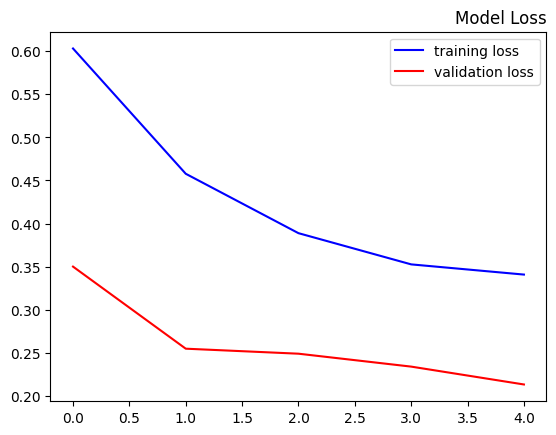

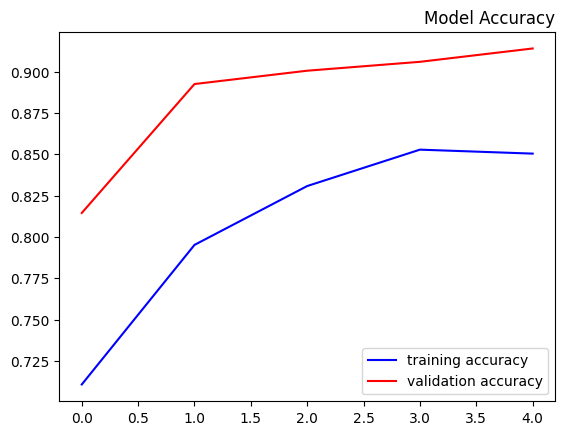

In [ ]:
# Plot Loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(len(train_loss)), train_loss, c='b', label='training loss')
plt.plot(range(len(val_loss)), val_loss, c='r', label='validation loss')
plt.title('Model Loss', loc='right')
plt.legend()
plt.show()

# Plot Accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(len(train_acc)), train_acc, c='b', label='training accuracy')
plt.plot(range(len(val_acc)), val_acc, c='r', label='validation accuracy')
plt.title('Model Accuracy', loc='right')
plt.legend()
plt.show()

In [ ]:
from keras.regularizers import l2

# Model definition
inception = keras.applications.inception_v3.InceptionV3(
    input_shape=(image_shape, image_shape, 3),
    include_top=False,
    weights='imagenet'
)
inception.trainable = False
last_output = inception.get_layer('mixed8').output

# Add L2 regularization to Dense layers
reg_lambda = 0.01  # Adjust the regularization strength as needed

x = Flatten()(last_output)
x = Dense(32, activation='relu', kernel_regularizer=l2(reg_lambda))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(reg_lambda))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid', kernel_regularizer=l2(reg_lambda))(x)

model = Model(inputs=inception.input, outputs=x)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=5e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    callbacks=[callbacks]
)

Epoch 1/5
157/157 [==============================] - 93s 561ms/step - loss: 1.5809 - accuracy: 0.6928 - val_loss: 1.1678 - val_accuracy: 0.8602
Epoch 2/5
157/157 [==============================] - 88s 558ms/step - loss: 1.1987 - accuracy: 0.7948 - val_loss: 0.9209 - val_accuracy: 0.8817
Epoch 3/5
157/157 [==============================] - 85s 542ms/step - loss: 1.0409 - accuracy: 0.7976 - val_loss: 0.8314 - val_accuracy: 0.8602
Epoch 4/5
157/157 [==============================] - 86s 545ms/step - loss: 0.9039 - accuracy: 0.8388 - val_loss: 0.7370 - val_accuracy: 0.8844
Epoch 5/5
157/157 [==============================] - 85s 544ms/step - loss: 0.8338 - accuracy: 0.8420 - val_loss: 0.6566 - val_accuracy: 0.9032


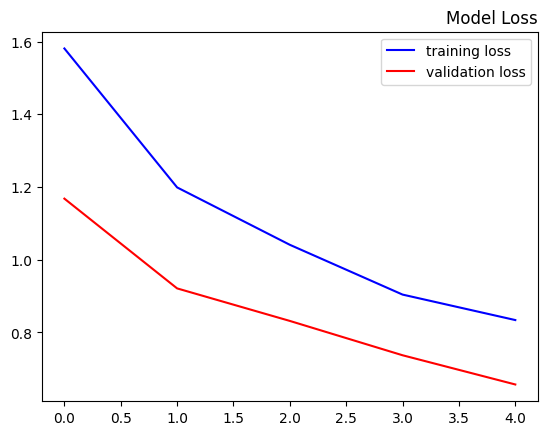

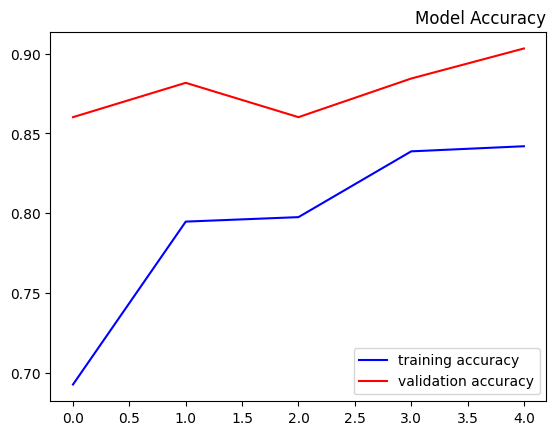

In [ ]:
# Plot Loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(len(train_loss)), train_loss, c='b', label='training loss')
plt.plot(range(len(val_loss)), val_loss, c='r', label='validation loss')
plt.title('Model Loss', loc='right')
plt.legend()
plt.show()

# Plot Accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(len(train_acc)), train_acc, c='b', label='training accuracy')
plt.plot(range(len(val_acc)), val_acc, c='r', label='validation accuracy')
plt.title('Model Accuracy', loc='right')
plt.legend()
plt.show()